<a href="https://colab.research.google.com/github/wdconinc/data-analysis-recipes-fitting-a-model-to-data/blob/master/Exercises_in_%22Data_Analysis_Recipes_Fitting_a_Model_to_Data%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Recipes: Fitting a Model to Data

This notebook works through the exercises in [arXiv:1008.4686v1](https://arxiv.org/abs/1008.4686) [astro-ph.IM] "Data Analysis Recipes: Fitting a Model to Data", by David W. Hogg, Jo Bovy, and Dustin Lang, hereafter the "paper".

Copyright of the material in the paper belongs to the original authors (see footnote 1 in the paper for license information). Fair use exception (educational use, excerpt) justifies copying the data from Table 1 into this notebook. Fair use exception (educational use, excerpt) justifies reproduction of some formulas for implementation in this notebook.

The license of the solutions to the paper's exercises in this notebook is Creative Commons Attribution Share Alike 4.0, CC BY-SA 4.0. Original author is Wouter Deconinck, William & Mary.

## Preamble

In [16]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Dataset

In [17]:
X = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146], dtype = float)
Y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344], dtype = float)

In [18]:
sigma_Y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22], dtype = float)
sigma_X = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5], dtype = float)
rho_XY = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.50, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56], dtype = float)

No correlations $\rho_{xy}$ are shown in the plot below.

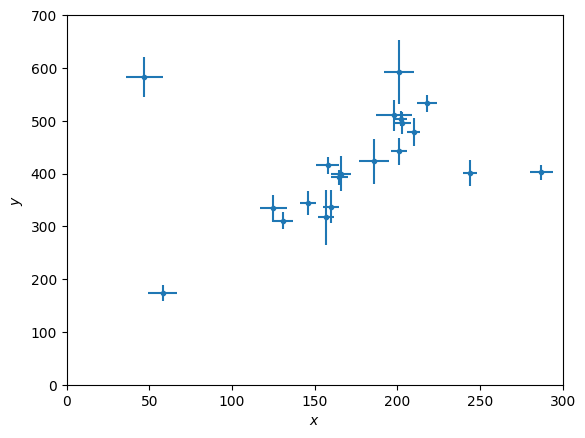

In [19]:
plt.errorbar(X, Y, xerr = sigma_X, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

## Exercise 1: Analytical linear least squares without outliers

In [20]:
Y1 = Y[4:]
A1 = np.column_stack([np.ones_like(X[4:]), X[4:]])
C1 = np.diag(sigma_Y[4:]**2)

In [21]:
X1 = inv(A1.T @ inv(C1) @ A1) @ (A1.T @ inv(C1) @ Y1)
S1 = inv(A1.T @ inv(C1) @ A1)
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (X1[0], np.sqrt(S1[0][0]), 
                                                 X1[1], np.sqrt(S1[1][1])))

b + m x = (34.047728 +/- 18.246167) + (2.239921 +/- 0.107780) x


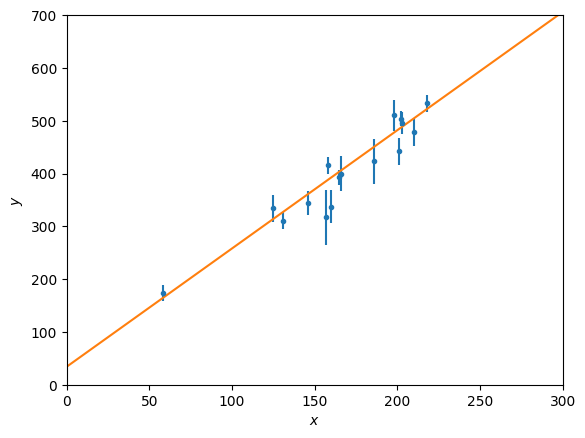

In [22]:
plt.errorbar(X[4:], Y[4:], yerr = sigma_Y[4:], marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
y = A @ X1
plt.plot(x, y);

## Exercise 2: Analytical linear least squares with outliers

In [23]:
Y2 = Y
A2 = np.column_stack([np.ones_like(X), X])
C2 = np.diag(sigma_Y**2)

In [24]:
X2 = inv(A2.T @ inv(C2) @ A2) @ (A2.T @ inv(C2) @ Y2)
S2 = inv(A2.T @ inv(C2) @ A2)
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (X2[0], np.sqrt(S2[0][0]),
                                                 X2[1], np.sqrt(S2[1][1])))

b + m x = (213.273492 +/- 14.394033) + (1.076748 +/- 0.077407) x


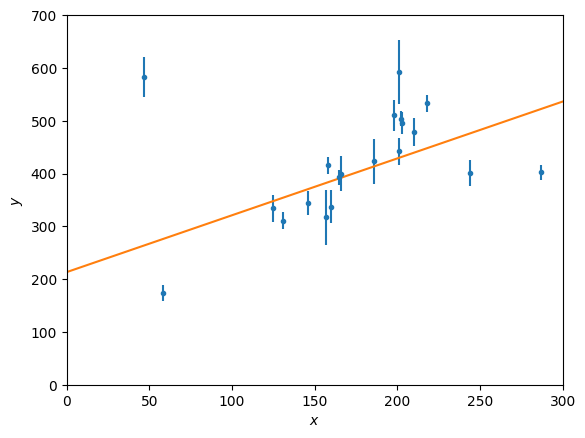

In [25]:
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
y = A @ X2
plt.plot(x, y);

## Exercise 3: Analytical quadratic solution with outliers

In [26]:
# My code
Y3 = Y[4:]
A3 = np.column_stack([np.ones_like(X[4:]), X[4:], X[4:]**2])
C3 = np.diag(sigma_Y[4:]**2)

X3 = inv(A3.T @ inv(C3) @ A3) @ (A3.T @ inv(C3) @ Y3)
S3 = inv(A3.T @ inv(C3) @ A3)

print("b + mx + qx^2 = (%f +/- %f) + (%f +/- %f)x + (%f +/- %f)x^2" % (X3[0], np.sqrt(S3[0][0]), X3[1], np.sqrt(S3[1][1]), X3[2], np.sqrt(S3[2][2])))

b + mx + qx^2 = (72.894626 +/- 38.911555) + (1.596050 +/- 0.579748)x + (0.002299 +/- 0.002034)x^2


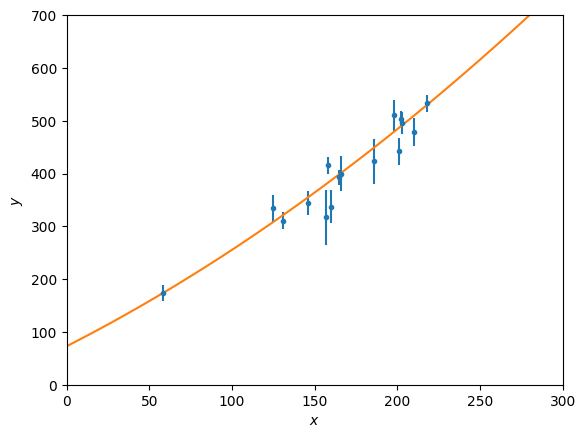

In [27]:
plt.errorbar(X[4:], Y3, sigma_Y[4:], marker=".", linestyle="")
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x, x**2])
y = A @ X3
plt.plot(x, y);

In [28]:
# given solution
Y3 = Y[4:]
A3 = np.column_stack([np.ones_like(X[4:]), X[4:], X[4:]**2])
C3 = np.diag(sigma_Y[4:]**2)

In [29]:
X3 = inv(A3.T @ inv(C3) @ A3) @ (A3.T @ inv(C3) @ Y3)
S3 = inv(A3.T @ inv(C3) @ A3)
print("b + m x + q x**2 = (%f +/- %f) + (%f +/- %f) x + (%f +/- %f) x**2" % (X3[0], np.sqrt(S3[0][0]),
                                                                             X3[1], np.sqrt(S3[1][1]),
                                                                             X3[2], np.sqrt(S3[2][2])))

b + m x + q x**2 = (72.894626 +/- 38.911555) + (1.596050 +/- 0.579748) x + (0.002299 +/- 0.002034) x**2


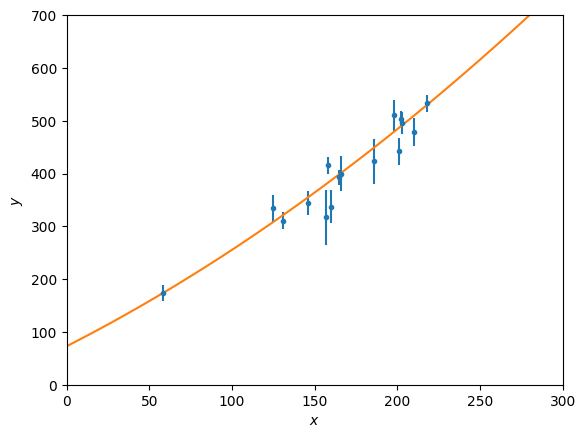

In [30]:
plt.errorbar(X[4:], Y[4:], yerr = sigma_Y[4:], marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x, x**2])
y = A @ X3
plt.plot(x, y);

## Exercise 4: Maximum likelihood for single value with normal measurement noise

The frequency distribution for $t_i$ is:
$$ p(t_i | \sigma_{ti}, T) = \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\left( -\frac{[t_i - T]^2}{2\sigma_{ti}^2} \right). $$
We can use this to calculate the likelihood
$$ \mathcal{L} = \prod_{i=1}^N p(t_i | \sigma_{ti}, T), $$
and log likelihood 
$$ \ln \mathcal{L} = K - \sum_{i=1}^N \frac{[t_i - T]^2}{2\sigma_{ti}^2}. $$
The maximum log likelihood is obtained when the derivative to $T$ is zero:
$$ 0 = \frac{d}{dT} \ln \mathcal{L} = \sum_{i=1}^N \frac{[t_i - T]}{\sigma_{ti}^2}. $$
Indeed this is a maximum:
$$ \frac{d}{dT} \ln \mathcal{L} = - \sum_{i=1}^N \frac{1}{\sigma_{ti}^2} < 0. $$
The maximum log likelihood is obtained when:
$$ T = \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{ti}^2}}, $$
or an expression given by the weighted mean.

## Exercise 5: Derivation of analytical expression

Starting from the definition of $\chi^2$ as
$$ \chi^2 = [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] $$
we can take a derivative with respect to $\mathbf{X}$ as
$$ 0 = \frac{d}{d\mathbf{X}} \chi^2 = -\mathbf{A}^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] -  [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} \mathbf{A} $$
or
$$ \mathbf{A}^T \mathbf{C}^{-1} \mathbf{A} \mathbf{X} = \mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y} $$
which is satisfied for
$$ \mathbf{X} = [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{A}]^{-1} [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y}] $$

## Exercises 6, 7: Mixture model using Metropolis-Hastings MCMC

The (unnormalized) likelihood $\mathcal{L}$ in (17) in the paper can be implemented:

In [31]:
def likelihood(x, y, sigma, b, m, Pb = 0.0, Yb = 0.0, Vb = 0.0):
  return np.prod( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2)        * np.exp(-(y-m*x-b)**2/(2*sigma**2))
                 + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2   /(2*(Vb + sigma**2))))

However, it makes more sense for reasons of numerical stability to use $\ln\mathcal{L}$, which turns the product into a sum of logs:

In [32]:
def log_likelihood(x, y, sigma, b, m, Pb = 0.0, Yb = 0.0, Vb = 0.0):
  return np.sum( np.log( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2)        * np.exp(-(y-m*x-b)**2/(2*sigma**2))
                        + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2/(2*(Vb + sigma**2)))))

b = 40.0
m = 2.2
np.testing.assert_almost_equal(np.exp(log_likelihood(X, Y, sigma_Y, b, m)), likelihood(X, Y, sigma_Y, b, m))

We first try to find the maximum likelihood for $P_b$ equal to zero, which should revert to the solutions of Exercise 1 (ignoring outliers) and Exercise 2 (including outliers).

### Reproducing Exercise 1: Analytical linear least squares without outliers

b + m x = (34.047639 +/- ?) + (2.239921 +/- ?) x
chi^2(b = 34.047639, m = 2.239921) = 74.306165


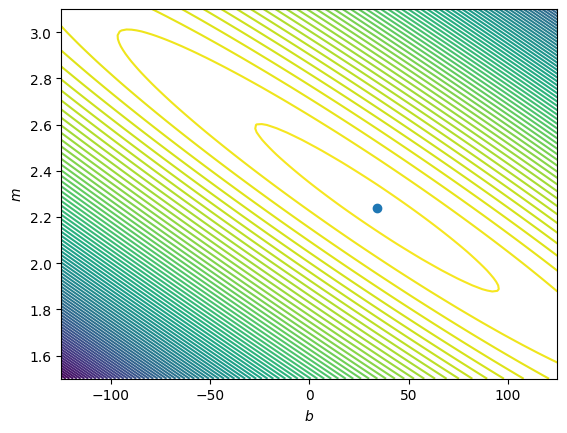

In [33]:
b = np.linspace(-125.0, +125.0, 100)
m = np.linspace(1.5, 3.1, 100)

L = np.ndarray((len(m), len(b)))
for i in range(len(m)):
  for j in range(len(b)):
    L[i,j] = log_likelihood(X[4:], Y[4:], sigma_Y[4:], b[j], m[i])

plt.contour(b, m, L, 100)

x0 = np.array([40.0, 2.2])
res = opt.minimize(lambda x: -log_likelihood(X[4:], Y[4:], sigma_Y[4:], x[0], x[1]), x0)
plt.plot(res.x[0], res.x[1], 'o')
plt.xlabel("$b$"); plt.ylabel("$m$");
print("b + m x = (%f +/- ?) + (%f +/- ?) x" % (res.x[0], 
                                                 res.x[1]))
print("chi^2(b = %f, m = %f) = %f" % (res.x[0], res.x[1], res.fun))

TODO: We could get the covariance matrix from the Jacobian: $\mathbf{C} \propto \mathbf{J}^T \mathbf{J}$

### Reproducing Exercise 2: Analytical linear least squares with outliers

b + m x = (213.273732 +/- ?) + (1.076746 +/- ?) x
chi^2(b = 213.273732, m = 1.076746) = 227.298782


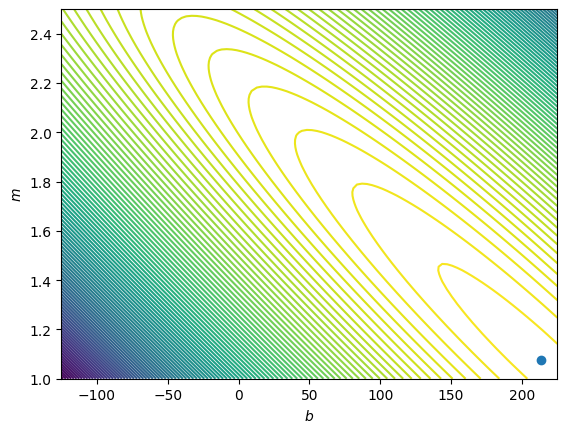

In [34]:
b = np.linspace(-125.0, +225.0, 100)
m = np.linspace(1.0, 2.5, 100)

L = np.ndarray((len(m), len(b)))
for i in range(len(m)):
  for j in range(len(b)):
    L[i,j] = log_likelihood(X, Y, sigma_Y, b[j], m[i])

plt.contour(b, m, L, 100)

x0 = np.array([40.0, 2.2])
res = opt.minimize(lambda x: -log_likelihood(X, Y, sigma_Y, x[0], x[1]), x0)
plt.plot(res.x[0], res.x[1], 'o')
plt.xlabel("$b$"); plt.ylabel("$m$");
print("b + m x = (%f +/- ?) + (%f +/- ?) x" % (res.x[0], 
                                                 res.x[1]))
print("chi^2(b = %f, m = %f) = %f" % (res.x[0], res.x[1], res.fun))

TODO: We could get the covariance matrix from the Jacobian: $\mathbf{C} \propto \mathbf{J}^T \mathbf{J}$

### Metropolis-Hastings Markov Chain Monte Carlo

We implement the Metropolis-Hasting Markov Chain Monte Carlo algorithm to sample the posterior distribution. For inspiration on how to implement this, see [Joseph Moukarzel's From Scratch post](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a). 

In [35]:
def metropolis_hastings(log_likelihood, acceptance, prior, transition, x0, iterations = 1000):
    x_old = x0
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new = transition(x_old)
        L_old = log_likelihood(x_old)
        L_new = log_likelihood(x_new) 
        if (acceptance(L_old + np.log(prior(x_old)), L_new + np.log(prior(x_new)))):            
            x_old = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)

    return np.array(accepted), np.array(rejected)

We now apply this with the following conditions:

* an acceptance criterion if $U(0,1) < \exp(\mathcal{L}_{new} - \mathcal{L}_{old})$,
* an uninformative prior that is flat for $P_b$ in $[0,1]$, and logarithmic in $V_b > 0$,
* a normal step distribution with 'reasonable' widths.



In [36]:
x0 = np.array([34., 2.2, 0.0, 0.0, 0.0])
s0 = np.array([10.0, 0.1, 0.2, 100.0, 100.0])
iterations = 1000000
accepted, rejected = metropolis_hastings(lambda x: log_likelihood(X, Y, sigma_Y, x[0], x[1], x[2], x[3], x[4]),
                                         lambda L_old, L_new: (np.random.uniform(0,1) < np.exp(L_new - L_old)), 
                                         lambda x: 0.0 if (x[2] <= 0 or x[2] >= 1 or x[4] <= 0) else 1.0 / x[4],
                                         lambda x: np.random.normal(x, s0),
                                         x0, iterations)

/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_79795/3865209980.py:9: RuntimeWarning: divide by zero encountered in log
  if (acceptance(L_old + np.log(prior(x_old)), L_new + np.log(prior(x_new)))):
/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_79795/2879819343.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum( np.log( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2)        * np.exp(-(y-m*x-b)**2/(2*sigma**2))
/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_79795/2879819343.py:3: RuntimeWarning: invalid value encountered in sqrt
  + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2/(2*(Vb + sigma**2)))))
/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_79795/2879819343.py:3: RuntimeWarning: overflow encountered in exp
  + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2/(2*(Vb + sigma**2)))))


In [37]:
print(100.0 * accepted.shape[0] / (accepted.shape[0] + rejected.shape[0]), "% acceptance rate (target is 50%)")

11.5577 % acceptance rate (target is 50%)


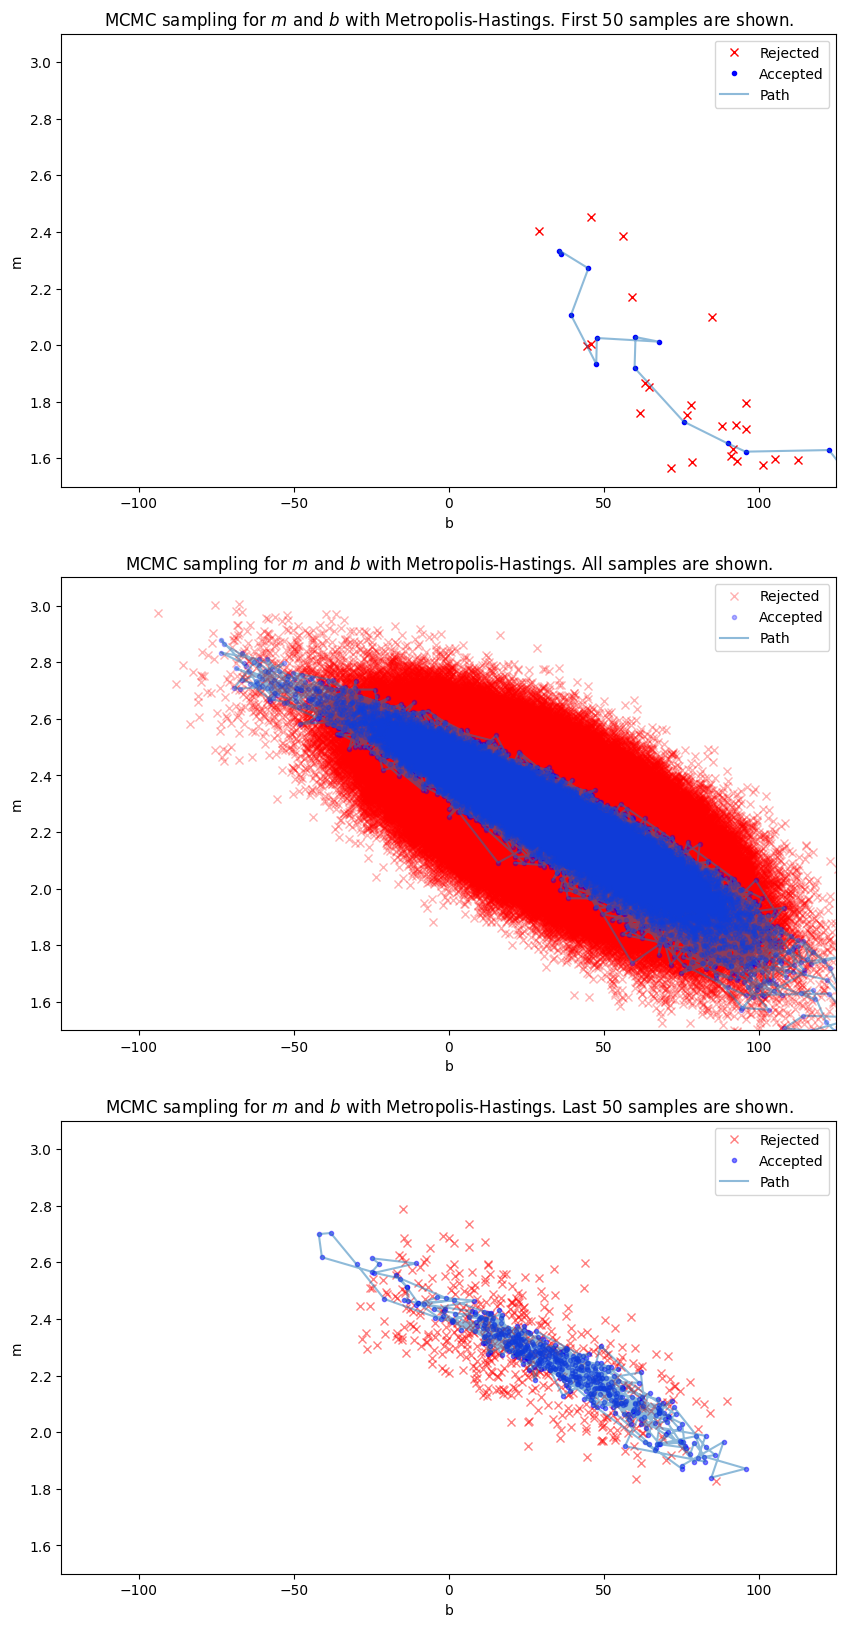

In [38]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label = 'Rejected')
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label = 'Accepted')
ax.plot(accepted[:50,0], accepted[:50,1], label = "Path", alpha = 0.5)
ax.set_xlabel("b");
ax.set_ylabel("m");
ax.set_xlim(-125.0, +125.0);
ax.set_ylim(1.5, 3.1);
ax.legend()
ax.set_title("MCMC sampling for $m$ and $b$ with Metropolis-Hastings. First 50 samples are shown."); 

ax = fig.add_subplot(3,1,2)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label = 'Rejected', alpha = 0.3)
ax.plot(accepted[:,0], accepted[:,1], 'b.', label = 'Accepted', alpha = 0.3)
ax.plot(accepted[:,0], accepted[:,1], label = "Path", alpha = 0.5)
ax.set_xlabel("b");
ax.set_ylabel("m");
ax.set_xlim(-125.0, +125.0);
ax.set_ylim(1.5, 3.1);
ax.legend()
ax.set_title("MCMC sampling for $m$ and $b$ with Metropolis-Hastings. All samples are shown.");

to_show = 500
ax = fig.add_subplot(3,1,3)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label = 'Rejected', alpha = 0.5)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label = 'Accepted', alpha = 0.5)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label = "Path", alpha = 0.5)
ax.set_xlabel("b");
ax.set_ylabel("m");
ax.set_xlim(-125.0, +125.0);
ax.set_ylim(1.5, 3.1);
ax.legend()
ax.set_title("MCMC sampling for $m$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.");

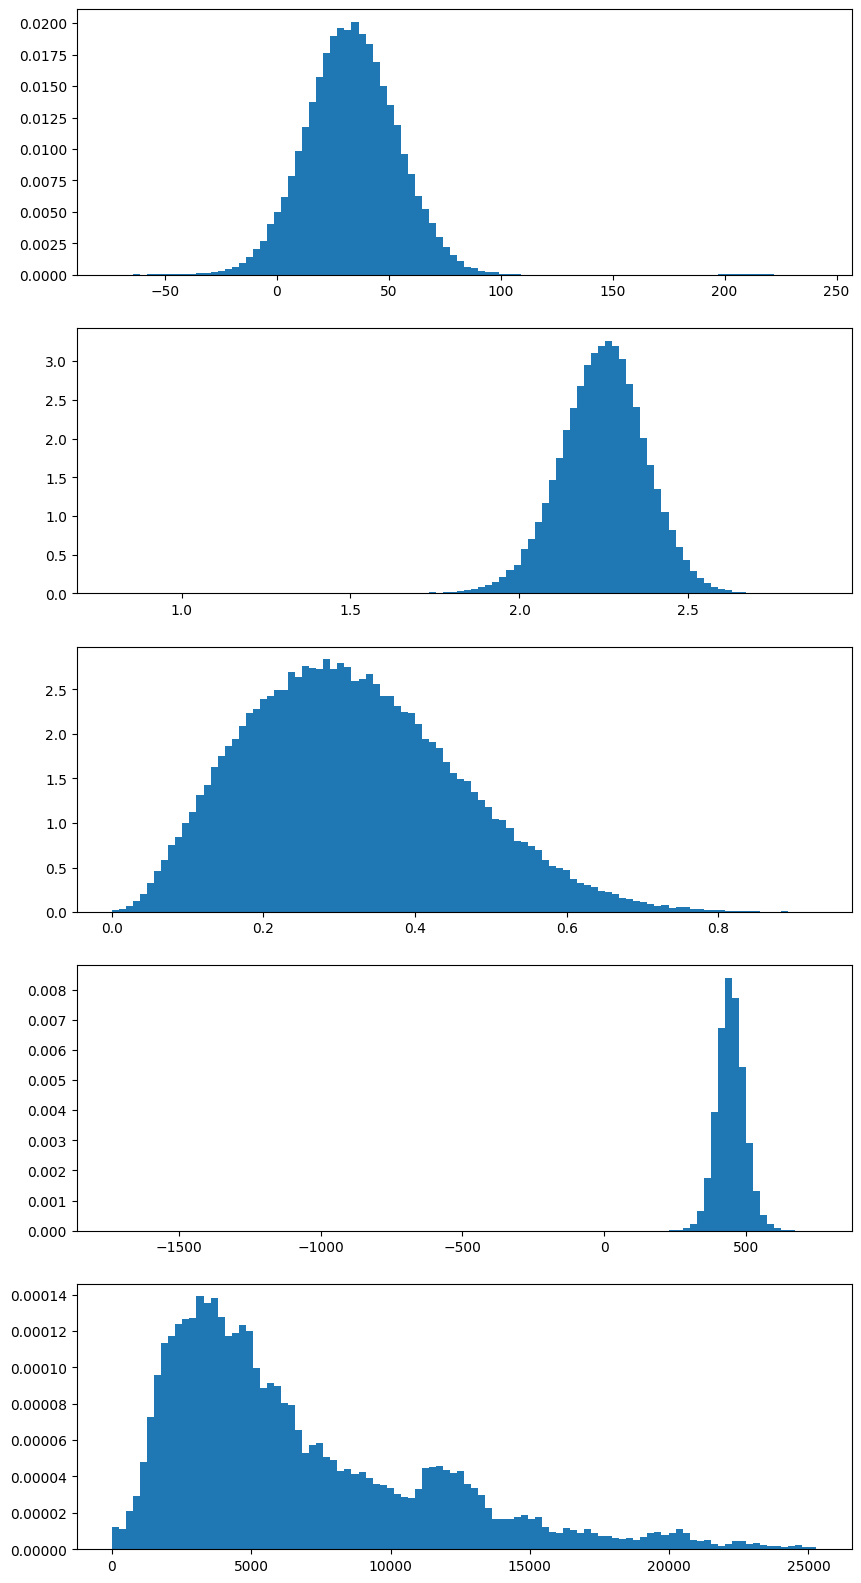

In [244]:
num_accepted = accepted.shape[0]

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(5,1,1)
plt.hist(accepted[:,0], density = True, bins = 100);
ax = fig.add_subplot(5,1,2)
plt.hist(accepted[:,1], density = True, bins = 100);
ax = fig.add_subplot(5,1,3)
plt.hist(accepted[:,2], density = True, bins = 100);
ax = fig.add_subplot(5,1,4)
plt.hist(accepted[:,3], density = True, bins = 100);
ax = fig.add_subplot(5,1,5)
plt.hist(accepted[:,4], density = True, bins = 100);

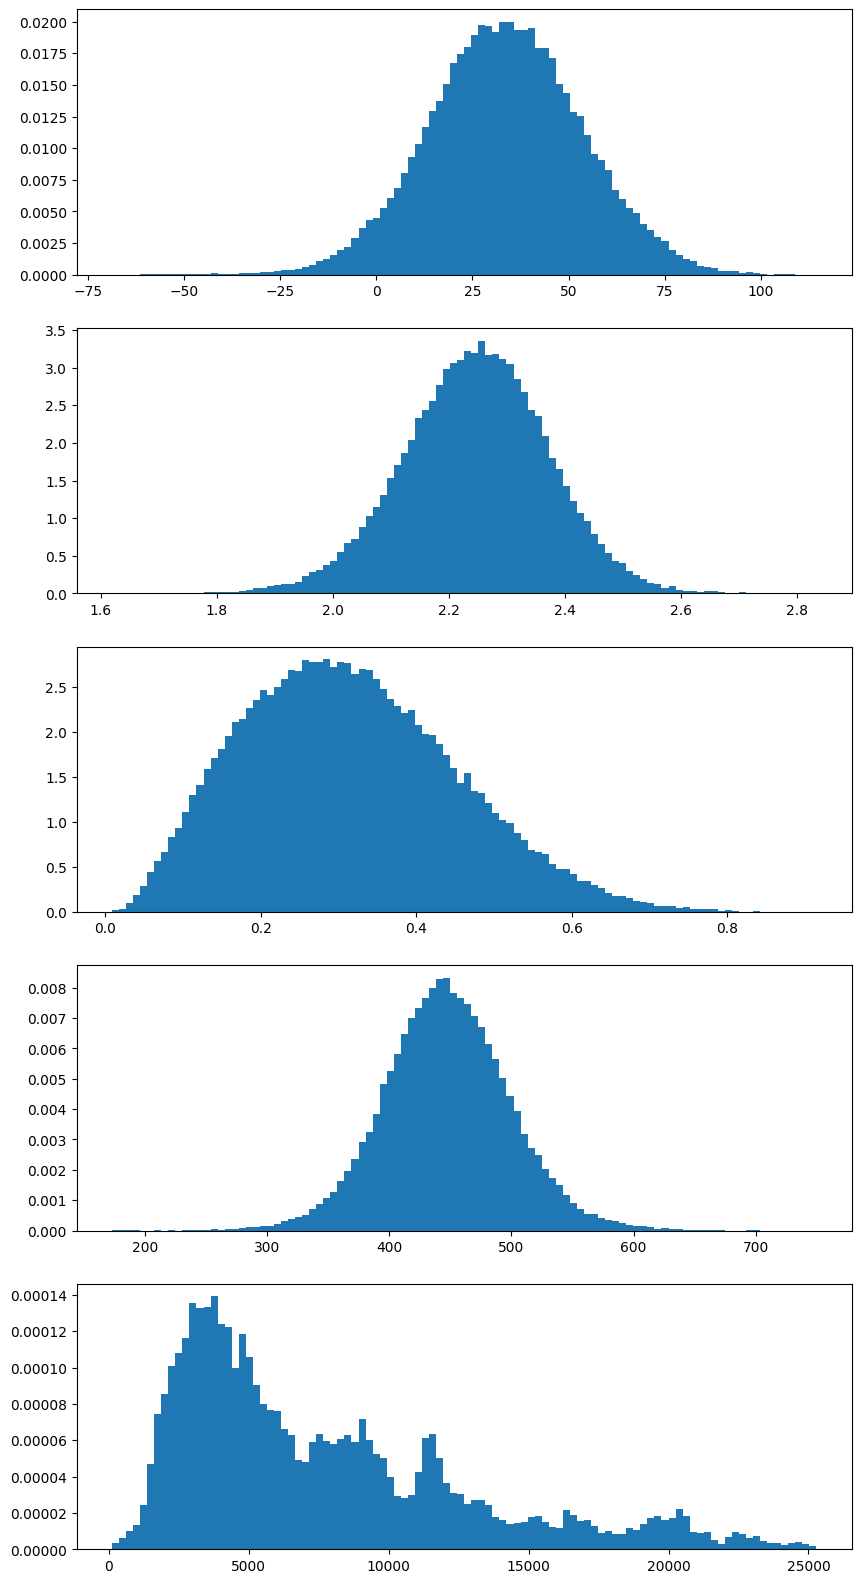

In [39]:
num_accepted = accepted.shape[0]

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(5,1,1)
plt.hist(accepted[int(0.5*num_accepted):,0], density = True, bins = 100);
ax = fig.add_subplot(5,1,2)
plt.hist(accepted[int(0.5*num_accepted):,1], density = True, bins = 100);
ax = fig.add_subplot(5,1,3)
plt.hist(accepted[int(0.5*num_accepted):,2], density = True, bins = 100);
ax = fig.add_subplot(5,1,4)
plt.hist(accepted[int(0.5*num_accepted):,3], density = True, bins = 100);
ax = fig.add_subplot(5,1,5)
plt.hist(accepted[int(0.5*num_accepted):,4], density = True, bins = 100);

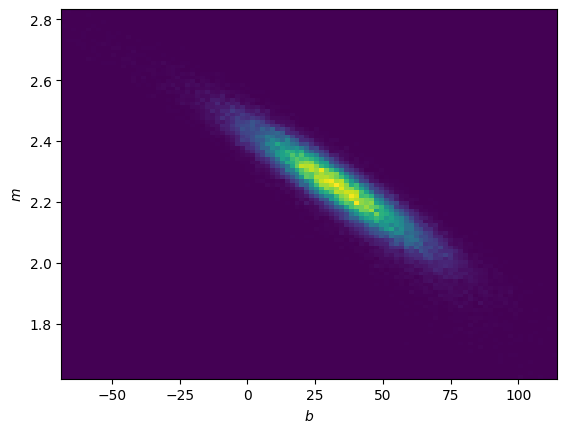

In [40]:
counts, xbins, ybins, image = plt.hist2d(accepted[int(0.5*num_accepted):,0],
                                         accepted[int(0.5*num_accepted):,1],
                                         bins = 100)
plt.xlabel("$b$"); plt.ylabel("$m$");

b + m x = (33.575582 +/- 20.155332) + (2.246183 +/- 0.125699) x


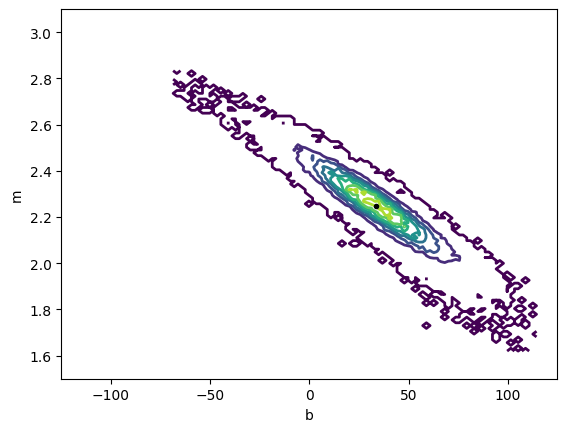

In [41]:
plt.contour(counts.T, extent = [xbins.min(), xbins.max(), ybins.min(), ybins.max()], linewidths = 2)
plt.xlabel("b"); plt.ylabel("m")
plt.xlim(-125.0, +125.0);
plt.ylim(1.5, 3.1);
plt.plot(np.mean(accepted[int(0.5*num_accepted):,0]), np.mean(accepted[int(0.5*num_accepted):,1]), '.k')
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (np.mean(accepted[int(0.5*num_accepted):,0]), np.std(accepted[int(0.5*num_accepted):,0]),
                                                 np.mean(accepted[int(0.5*num_accepted):,1]), np.std(accepted[int(0.5*num_accepted):,1])))

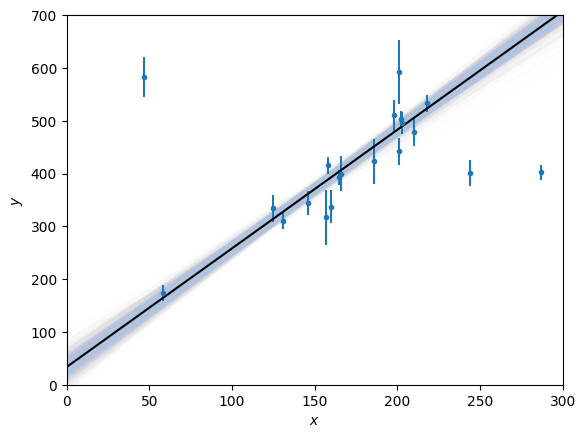

In [42]:
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
for i in np.random.randint(int(0.8*num_accepted), num_accepted, 1000):
  y = A @ np.array([accepted[i,0], accepted[i,1]])
  plt.plot(x, y, color = 'lightsteelblue', alpha = 0.005);
  
y = A @ np.array([np.mean(accepted[int(0.5*num_accepted):,0]), np.mean(accepted[int(0.5*num_accepted):,1])])
plt.plot(x, y, 'k');

## Exercises 6, 7: Mixture model using PyStan

### Reproducing Exercise 2: Analytical linear least squares without outliers

In [5]:
import sys
print(sys.executable)

/Users/ryogojohnkatahira/opt/anaconda3/envs/astro/bin/python


In [13]:
import stan as pystan

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    vector[N] sy;
}
parameters {
    real b;
    real m;
}
model {
    y ~ normal(b + m * x, sy);
}
"""

In [ ]:
# Put our data in a dictionary
data = {'N': len(X), 'x': X, 'y': Y, 'sy': sigma_Y}

# Compile the model
sm = pystan.StanModel(model_code = model)

# Train the model and generate samples
fit = sm.sampling(data = data, iter = 1000, chains = 4, warmup = 500, thin = 1)

AttributeError: module 'stan' has no attribute 'Model'

In [0]:
import pandas as pd

summary_dict = fit.summary()

df = pd.DataFrame(summary_dict['summary'], 
                  columns = summary_dict['summary_colnames'], 
                  index = summary_dict['summary_rownames'])

b_mean, m_mean = df['mean']['b'], df['mean']['m']

# Extracting traces
b = fit['b']
m = fit['m']
lp = fit['lp__']

In [0]:
# Plot mean regression line
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "")
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

# Plotting regression line
x_min, x_max = 0.0, 300.0
x_plot = np.linspace(x_min, x_max, 100)
plt.plot(x_plot, b_mean + m_mean * x_plot, '-k')

# Plot a subset of sampled regression lines
np.random.shuffle(m), np.random.shuffle(b)
for i in range(1000):
  plt.plot(x_plot, b[i] + m[i] * x_plot,
           color = 'lightsteelblue', 
           alpha = 0.005 )

plt.title('Fitted Regression Line');

### Mixture of linear signal with normal and constant backgound with normal

See for example the [Stan user guide](https://mc-stan.org/docs/2_19/stan-users-guide/summing-out-the-responsibility-parameter.html).

In [0]:
import pystan

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    vector[N] sy;
}
parameters {
    real b;
    real m;
    simplex[2] Pb;
    real Yb;
    real<lower=0> Vb;
}
model {
    vector[2] log_Pb = log(Pb);
    for (n in 1:N) {
        vector[2] lps = log_Pb;
        real mu = b + m * x[n];
        lps[1] += normal_lpdf(y[n] | mu, sy[n]);
        real sby = sqrt(Vb + sy[n]^2);
        lps[2] += normal_lpdf(y[n] | Yb, sby);
        target += log_sum_exp(lps);
    }
}
"""

In [0]:
# Put our data in a dictionary
data = {'N': len(X), 'x': X, 'y': Y, 'sy': sigma_Y}

# Compile the model
sm = pystan.StanModel(model_code = model)

# Train the model and generate samples
fit = sm.sampling(data = data, iter = 1000, chains = 4, warmup = 500, thin = 1, control = {'max_treedepth': 20})

In [0]:
import pandas as pd

summary_dict = fit.summary()

df = pd.DataFrame(summary_dict['summary'], 
                  columns = summary_dict['summary_colnames'], 
                  index = summary_dict['summary_rownames'])

b_mean, m_mean = df['mean']['b'], df['mean']['m']

# Extracting traces
b = fit['b']
m = fit['m']
lp = fit['lp__']

In [0]:
# Plot mean regression line
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "")
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

# Plotting regression line
x_min, x_max = 0.0, 300.0
x_plot = np.linspace(x_min, x_max, 100)
plt.plot(x_plot, b_mean + m_mean * x_plot, '-k')

# Plot a subset of sampled regression lines
np.random.shuffle(m), np.random.shuffle(b)
for i in range(1000):
  plt.plot(x_plot, b[i] + m[i] * x_plot,
           color = 'lightsteelblue', 
           alpha = 0.005 )

plt.title('Fitted Regression Line')

## Exercises 6, 7: Full exponential model using PyStan

Binomial prior probability on the data rejection:
$$ p(\{q_i\}_{i=1}^N|P_b,I) = \prod_{i=1}^N [1-P_b]^{q_i} P_b^{[1-q_i]} $$

In [0]:
def prior(q, Pb):
  return np.prod( (1-Pb)**q * Pb**(1-q) )

N = 10
Pb = 0.7
np.testing.assert_almost_equal(p(np.zeros(N),Pb), Pb**N)
np.testing.assert_almost_equal(p(np.ones(N),Pb), (1-Pb)**N)

## Exercise 8

In [60]:
# Re-do Ex. 2
Y8 = Y
A8 = np.column_stack([np.ones_like(X), X])
C8 = np.diag(sigma_Y**2)

X8 = inv(A8.T @ inv(C8)@A8)@(A8.T @ inv(C8) @ Y8)
S8 = inv(A8.T @ inv(C8) @ A8)

print("The uncertainty by standard model is +/- %f" % np.sqrt(S8[1][1]))

The uncertainty by standard model is +/- 0.077407


In [78]:
# Jackknife
mi = []
N = len(Y8)
for i in range(N):
    Aj = np.delete(A8, i, axis=0)
    Yj = np.delete(Y8, i, axis=0)
    sigma_j = np.delete(sigma_Y, i)
    Cj = np.diag(sigma_j**2)
    mi.append((inv(Aj.T @ inv(Cj)@Aj)@(Aj.T @ inv(Cj) @ Yj))[1])

Sj = (N-1)*(np.sum((np.array(mi)-X8[1])**2))/N
print("The uncertainty by Jackknife is +/- %f" % np.sqrt(Sj))

The uncertainty by Jackknife is +/- 0.874064


In [91]:
# Bootstrap -- i assume 20 trials mean here, as M=20
M = 20
mj = []

for j in range(M):
    random_idx = np.random.choice(np.arange(0,20), size=20)
    Ab = A8[random_idx]
    Yb = Y8[random_idx]
    sigma_b = sigma_Y[random_idx]
    Cb = np.diag(sigma_b**2)
    mj.append((inv(Ab.T @ inv(Cb)@Ab)@(Ab.T @ inv(Cb) @ Yb))[1])

Sb = (np.sum((np.array(mj)-X8[1])**2))/M
print("The uncertainty by Bootstrap is +/- %f" % np.sqrt(Sb))

The uncertainty by Bootstrap is +/- 0.653941


## Using Emcee

In [ ]:
# Do the MCMC with Y[4:], and make the contour plots for m and b
# Do the MCMC with Y[4:], but reduce all of sigma_Y/2, and make contour plots
# Do the standard model and get values for m and b and uncertainties
# Plot these m and b on top of these contour plots and have two plots next to each other

In [330]:
def log_likelihood2(x, y, sigma, b, m, Pb = 0.0, Yb = 0.0, Vb = 0.0):
  # print("x: %s, y: %s, sigma: %s, b: %f, m: %f, Pb: %f, Yb:%f, Vb: %f" % (x, y, sigma, b, m, Pb, Yb, Vb))
  # print("b: %f, m: %f, Pb: %f, Yb:%f, Vb: %f" % (b, m, Pb, Yb, Vb))
  return np.sum( np.log( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2)        * np.exp(-(y-m*x-b)**2/(2*sigma**2))
                        + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2/(2*(Vb + sigma**2)))))

In [331]:
def prior (Pb, Vb):
    # if Pb <= 0 or Pb >= 1 or Vb <= 0:
    #     return 0
    # else:
    #     return 1.0/Vb

    return 1.0/Vb

In [332]:
def log_prob(x0, x, y, sigma):
    if (x0[2]>=1) or (x0[2]<=0) or (x0[4] <=0) or (np.any(np.abs(x0) > 1000)):
        return -np.inf
    prob = log_likelihood2(x, y, sigma, x0[0], x0[1], x0[2], x0[3], x0[4]) + np.log(prior(x0[2], x0[4]))
    if not np.isfinite(prob):
        return -np.inf
    else:
        return prob

In [333]:
import emcee

In [287]:
nwalkers = 10
ndim = 5

x0_mean = np.array([34., 2.2, 0.0, 0.0, 0.0])
# Add small random noise to initialize each walker near x0_mean
x0 = x0_mean + 1e-4 * np.random.randn(nwalkers, ndim)
# x0 = np.tile(x0_mean, (nwalkers, 1))
# x0[:, 0] += 1e-4 * np.random.randn(nwalkers)
# x0[:, 1] += 1e-4 * np.random.randn(nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[X, Y, sigma_Y])

In [295]:
state = sampler.run_mcmc(x0, 100)
sampler.reset()
sampler.run_mcmc(state, 20000)

State([[1.10059014e+01 2.33694237e+00 2.70302391e-01 4.35709796e+02
  7.26816739e+02]
 [1.70203418e+01 2.31406157e+00 3.40344282e-01 4.13945479e+02
  8.82705585e+02]
 [1.72687652e+01 2.30464734e+00 1.22928273e-01 4.64745431e+02
  7.58667140e+02]
 [3.74276494e+01 2.18024814e+00 3.55602949e-01 4.44569340e+02
  8.15180128e+02]
 [3.98206263e+01 2.21667937e+00 3.38329399e-01 4.42349400e+02
  6.91152099e+02]
 [4.14124633e+01 2.21559983e+00 3.49685615e-01 4.05634003e+02
  7.60788898e+01]
 [1.21391933e+01 2.31339885e+00 3.41982551e-01 4.22298294e+02
  8.02124399e+02]
 [3.59456216e+01 2.27872628e+00 2.12336044e-01 4.29964319e+02
  6.46792522e+02]
 [1.47471681e+01 2.31862108e+00 2.49944476e-01 4.32417801e+02
  8.87826754e+02]
 [2.00583268e+01 2.33011215e+00 2.81092397e-01 4.31277398e+02
  2.59214832e+01]], log_prob=[-115.12867972 -115.22722179 -116.33853408 -115.21099893 -114.37378283
 -115.25575772 -116.19479146 -114.81305215 -114.75860478 -113.63935431], blobs=None, random_state=('MT19937', ar

In [ ]:
np.isfinite(log_likelihood2(X, Y, sigma_Y, x0[0][0], x0[0][1], x0[0][2], x0[0][3], x0[0][4]) + np.log(prior(x0[0][2], x0[0][4])))

/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_79795/458258284.py:1: RuntimeWarning: divide by zero encountered in log
  np.isfinite(log_likelihood(X, Y, sigma_Y, x0[0][0], x0[0][1], x0[0][2], x0[0][3], x0[0][4]) + np.log(prior(x0[0][2], x0[0][4])))


False

In [198]:
log_prob(x0[9], X, Y, sigma_Y)

/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_79795/1295591213.py:2: RuntimeWarning: divide by zero encountered in log
  prob = log_likelihood(x, y, sigma, x0[0], x0[1], x0[2], x0[3], x0[4]) + np.log(prior(x0[2], x0[4]))


-1e+300

In [237]:
#sampler.get_chain()[step][walker][value]
sampler.get_chain(flat=True).shape

(100000, 5)

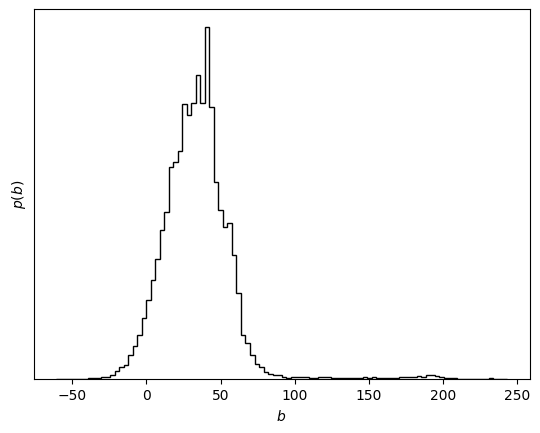

In [296]:
samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$b$")
plt.ylabel(r"$p(b)$")
plt.gca().set_yticks([]);

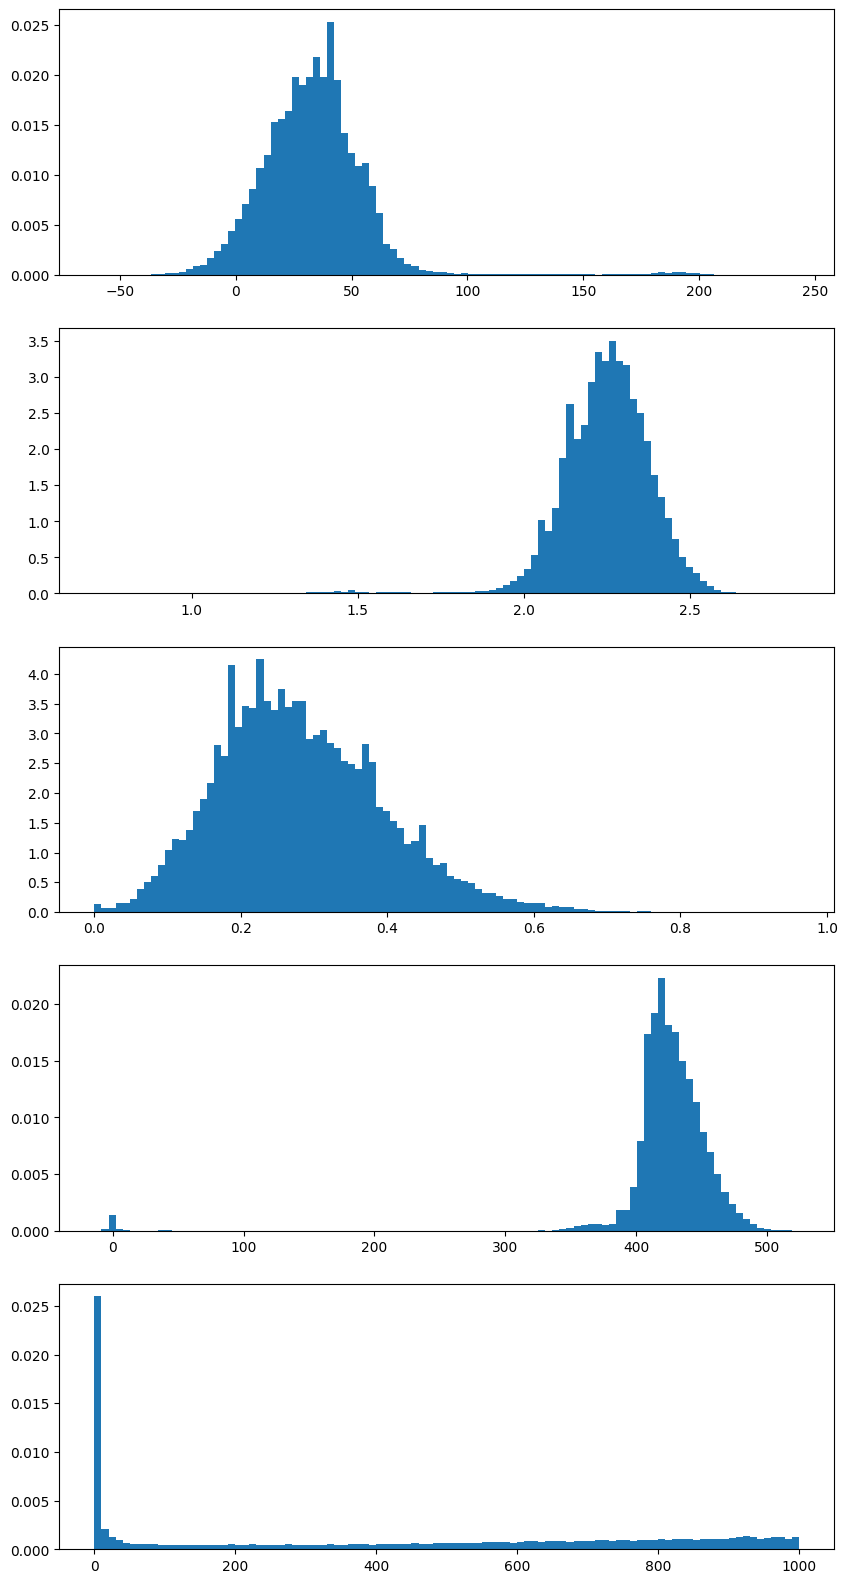

In [297]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(5,1,1)
plt.hist(samples[:,0], density = True, bins = 100);
ax = fig.add_subplot(5,1,2)
plt.hist(samples[:,1], density = True, bins = 100);
ax = fig.add_subplot(5,1,3)
plt.hist(samples[:,2], density = True, bins = 100);
ax = fig.add_subplot(5,1,4)
plt.hist(samples[:,3], density = True, bins = 100);
ax = fig.add_subplot(5,1,5)
plt.hist(samples[:,4], density = True, bins = 100);

In [298]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.387


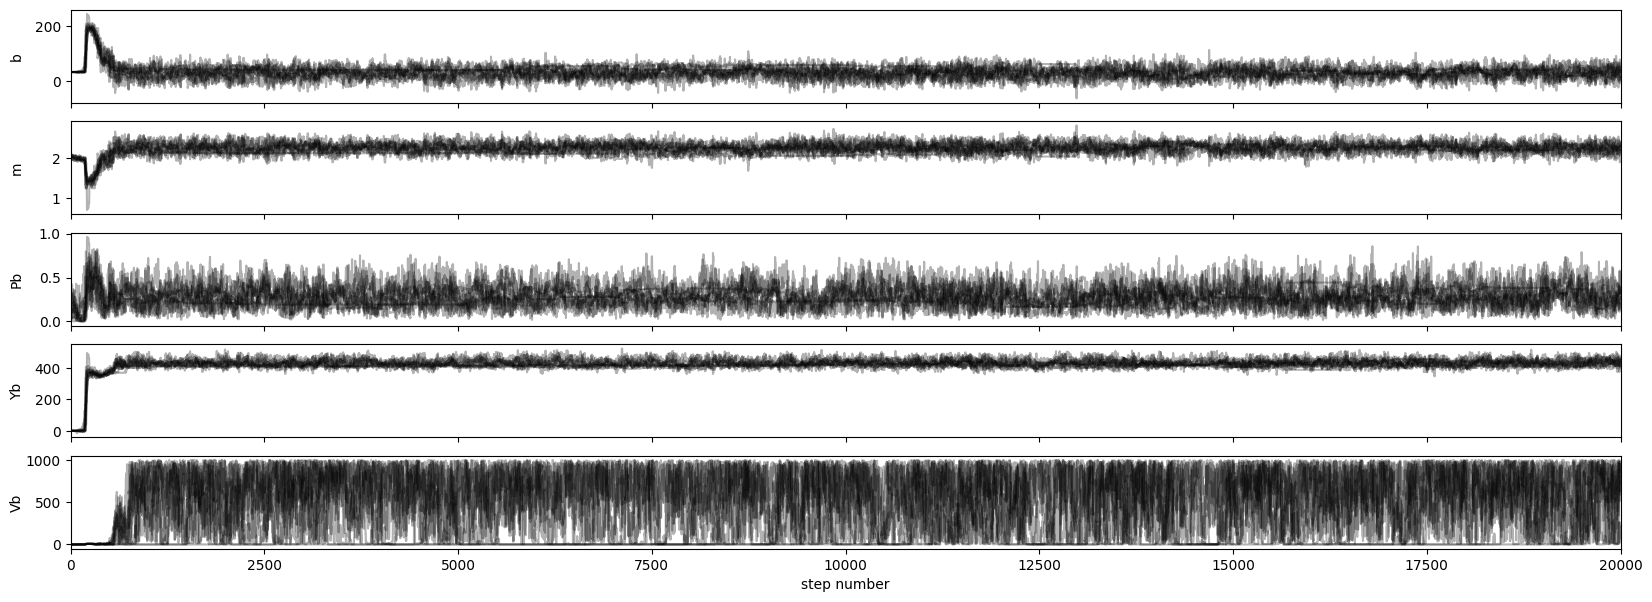

In [310]:
fig, axes = plt.subplots(5, figsize=(20, 7), sharex=True)
samples = sampler.get_chain()
labels = ["b", "m", "Pb", "Yb", "Vb"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.03, 0.5)

axes[-1].set_xlabel("step number");

In [299]:
#?
log_prob, blob = sampler.compute_log_prob(coords=x0)
log_prob

array([         -inf,          -inf,          -inf,          -inf,
       -331.06575559,          -inf,          -inf,          -inf,
                -inf,          -inf])

In [300]:
sampler.get_log_prob()

array([[-301.77362121, -304.63261478, -303.97599332, ..., -306.096964  ,
        -307.18367708, -309.46613076],
       [-301.77362121, -303.87875202, -303.90872761, ..., -306.096964  ,
        -308.46222808, -310.26764801],
       [-301.77362121, -303.89438889, -303.90517788, ..., -306.096964  ,
        -309.78424231, -310.26764801],
       ...,
       [-115.06339222, -115.25547057, -116.33853408, ..., -115.15333479,
        -114.8155765 , -113.63538597],
       [-115.05792767, -115.22722179, -116.33853408, ..., -114.79438306,
        -114.8155765 , -113.63538597],
       [-115.12867972, -115.22722179, -116.33853408, ..., -114.81305215,
        -114.75860478, -113.63935431]])

In [ ]:
sampler.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [261.3217953  365.90071404 233.76596712 328.83442356 699.59466843]

In [304]:
# This suggests that only about 300 steps (avg) are needed for the chain to “forget” where it started.
# It’s not unreasonable to throw away a few times this number of steps as “burn-in”. 
# Let’s discard the initial 100 steps, thin by about half the autocorrelation time (15 steps), and flatten the chain so that we have a flat list of samples:
flat_samples = sampler.get_chain(discard=100, thin=150, flat=True)
print(flat_samples.shape)

(1320, 5)


In [313]:
import corner

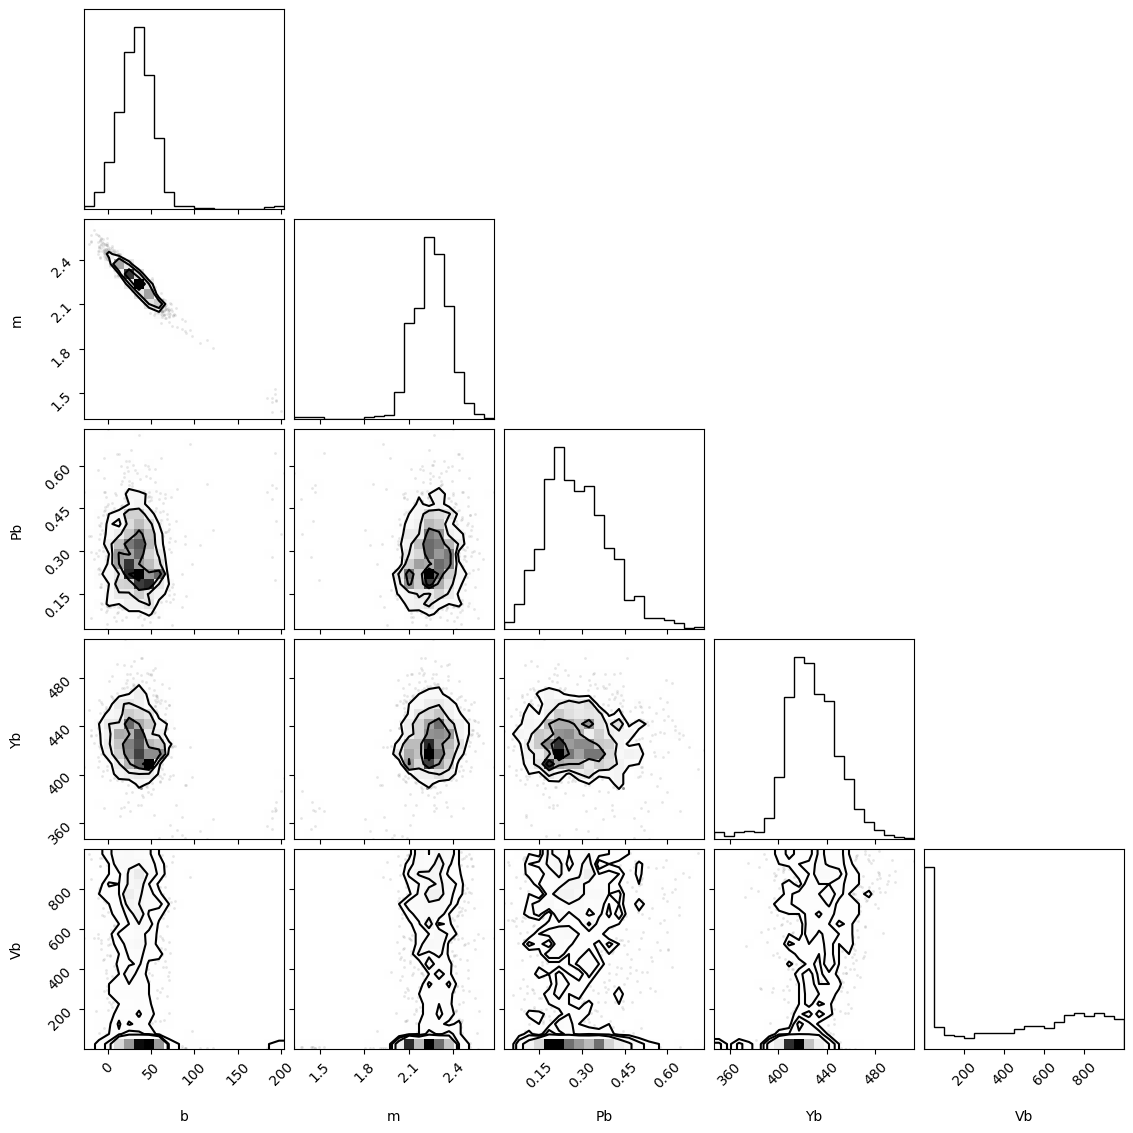

In [ ]:
fig = corner.corner(
    flat_samples, labels=labels
);

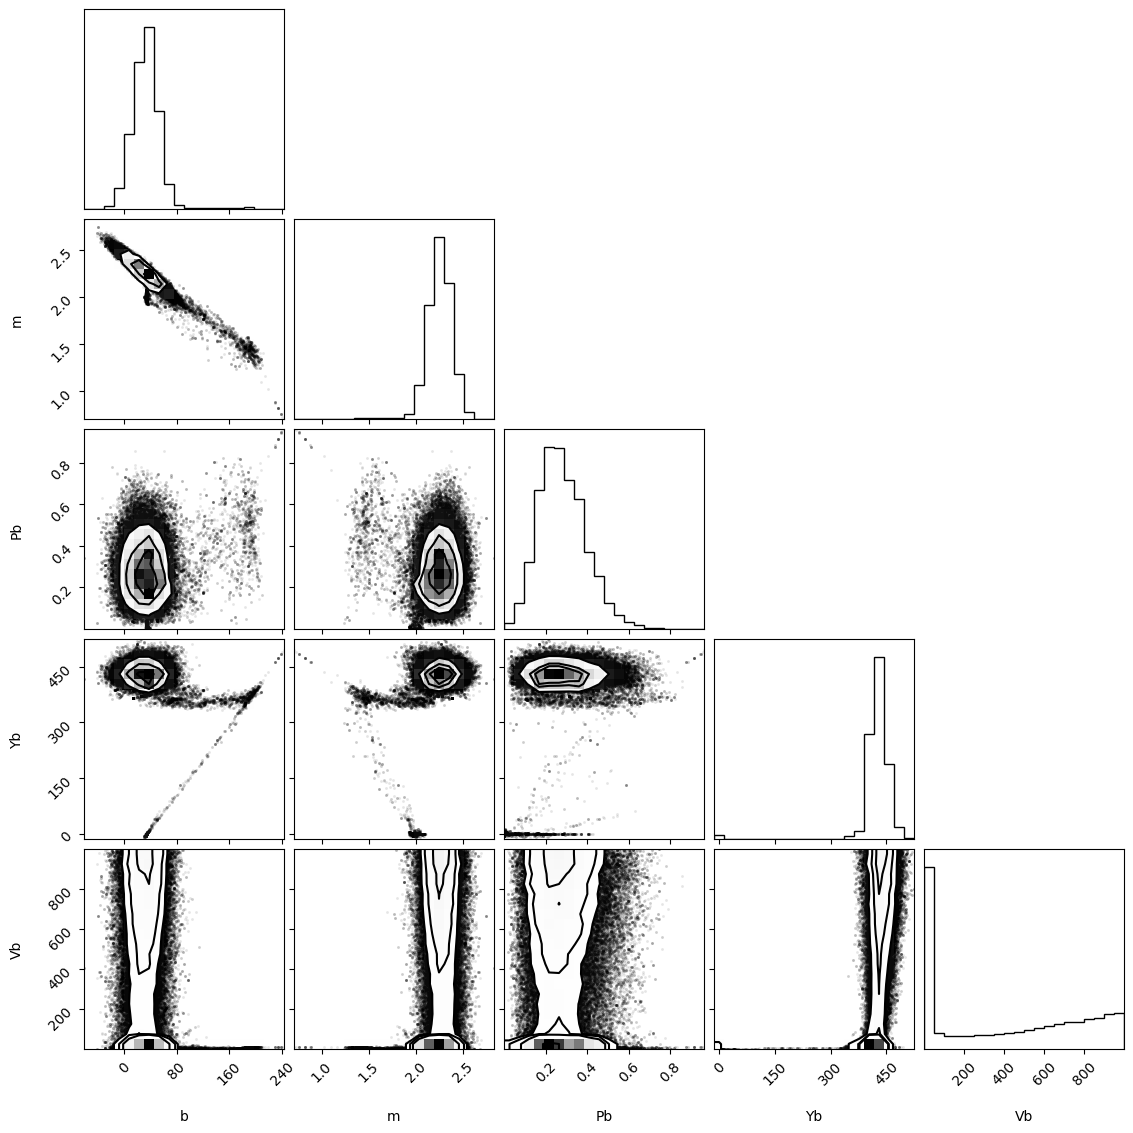

In [316]:
samples = sampler.get_chain(flat=True)
fig = corner.corner(
    samples, labels=labels
);

In [ ]:
plt.contour(counts.T, extent = [xbins.min(), xbins.max(), ybins.min(), ybins.max()], linewidths = 2)
plt.xlabel("b"); plt.ylabel("m")
plt.xlim(-125.0, +125.0);
plt.ylim(1.5, 3.1);
plt.plot(np.mean(accepted[int(0.5*num_accepted):,0]), np.mean(accepted[int(0.5*num_accepted):,1]), '.k')
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (np.mean(accepted[int(0.5*num_accepted):,0]), np.std(accepted[int(0.5*num_accepted):,0]),
                                                 np.mean(accepted[int(0.5*num_accepted):,1]), np.std(accepted[int(0.5*num_accepted):,1])))


plt.contour

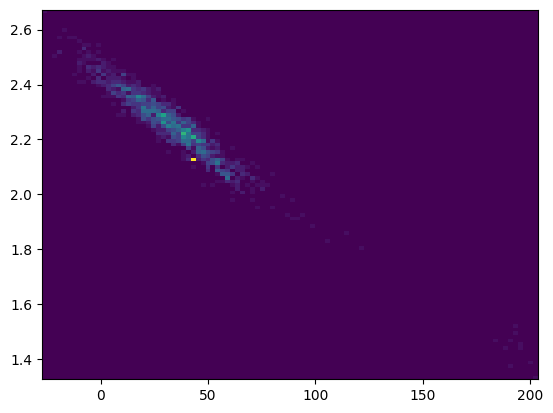

In [318]:
counts, xbins, ybins, image = plt.hist2d(flat_samples[:,0],
                                         flat_samples[:,1],
                                         bins = 100)

b + m x = (33.992069 +/- 23.344205) + (2.247217 +/- 0.134283) x


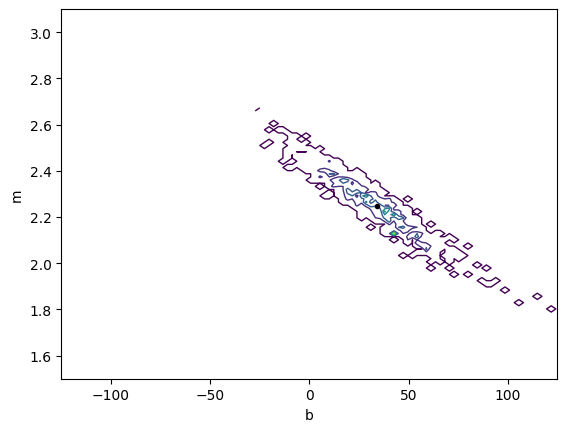

In [321]:
plt.contour(counts.T, extent = [xbins.min(), xbins.max(), ybins.min(), ybins.max()], linewidths = 1)
plt.xlabel("b"); plt.ylabel("m")
plt.xlim(-125.0, +125.0);
plt.ylim(1.5, 3.1);
plt.plot(np.mean(flat_samples[:,0]), np.mean(flat_samples[:,1]), '.k')
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (np.mean(flat_samples[:,0]), np.std(flat_samples[:,0]),
                                                 np.mean(flat_samples[:,1]), np.std(flat_samples[:,1])))

b + m x = (33.992069 +/- 23.344205) + (2.247217 +/- 0.134283) x


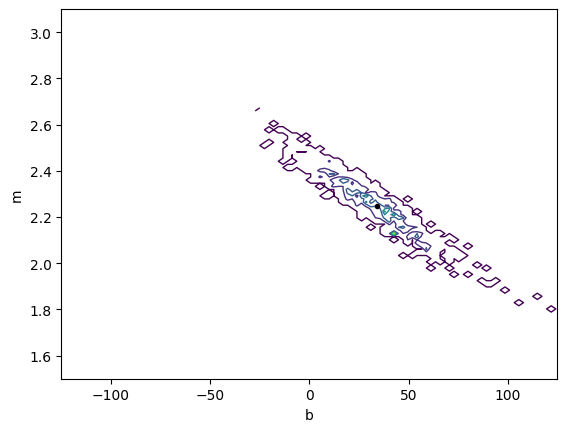

In [ ]:
plt.contour(counts.T, extent = [xbins.min(), xbins.max(), ybins.min(), ybins.max()], linewidths = 1)
plt.xlabel("b"); plt.ylabel("m")
plt.xlim(-125.0, +125.0);
plt.ylim(1.5, 3.1);
plt.plot(np.mean(flat_samples[:,0]), np.mean(flat_samples[:,1]), '.k')
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (np.mean(flat_samples[:,0]), np.std(flat_samples[:,0]),
                                                 np.mean(flat_samples[:,1]), np.std(flat_samples[:,1])))

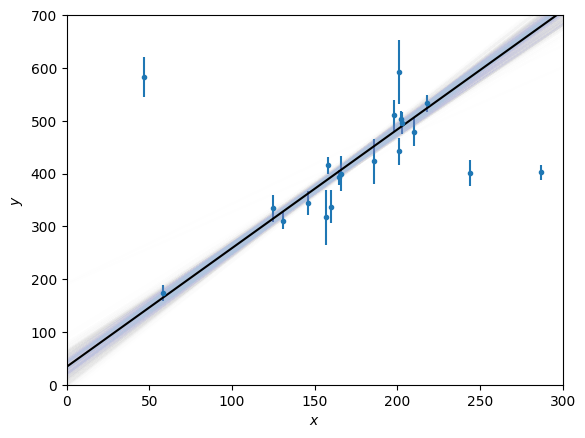

In [324]:
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
for i in np.random.randint(len(flat_samples), size=500):
  y = A @ np.array([flat_samples[i,0], flat_samples[i,1]])
  plt.plot(x, y, color = 'lightsteelblue', alpha = 0.01);
  
y = A @ np.array([np.mean(flat_samples[:,0]), np.mean(flat_samples[:,1])])
plt.plot(x, y, 'k');

## Exercise 9

In [346]:
nwalkers = 10
ndim = 5

x0_mean = np.array([34., 2.2, 0.0, 0.0, 0.0])
# Add small random noise to initialize each walker near x0_mean
x0 = x0_mean + 1e-4 * np.random.randn(nwalkers, ndim)
# x0 = np.tile(x0_mean, (nwalkers, 1))
# x0[:, 0] += 1e-4 * np.random.randn(nwalkers)
# x0[:, 1] += 1e-4 * np.random.randn(nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[X[4:], Y[4:], sigma_Y[4:]])

In [347]:
state = sampler.run_mcmc(x0, 100)
sampler.reset()
sampler.run_mcmc(state, 50000)

State([[ 4.80094873e+01  2.16556220e+00  3.79871314e-02 -6.88927586e+02
   4.84724421e-16]
 [ 4.78075002e+01  2.09345999e+00  1.98484809e-01 -4.53175082e+02
   2.38461721e-01]
 [ 3.61834234e+01  2.26084933e+00  3.51270369e-02 -7.53100151e+02
   8.85626509e-08]
 [ 1.57032197e+01  2.32952823e+00  3.08728704e-02  9.36451920e+01
   3.75583008e-16]
 [ 4.88660850e+01  2.21845149e+00  1.01432697e-02 -9.12038478e+02
   1.32734610e-09]
 [ 4.32925944e+01  2.21398406e+00  3.52643226e-02  7.14559688e+02
   1.80525135e+02]
 [ 1.95357662e+01  2.32547480e+00  5.74998682e-02  6.24489419e+02
   3.38152911e-14]
 [ 8.04051482e+00  2.43996989e+00  6.56652192e-02  3.05823921e+02
   1.51850880e-11]
 [ 5.22200158e+01  2.15426436e+00  3.17638178e-02 -1.21042239e+02
   1.57713447e-01]
 [ 3.21555986e+01  2.24836361e+00  1.62661859e-01  9.26686139e+02
   1.40358225e-05]], log_prob=[-39.96897181 -79.31604098 -59.25768527 -39.91322819 -56.55731342
 -80.59932866 -44.55772494 -52.41274819 -73.64288843 -65.98103561],

In [348]:
sampler.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1000;
tau: [1173.7187346  1136.87549631  872.39531107  831.10019108 1024.14990237]

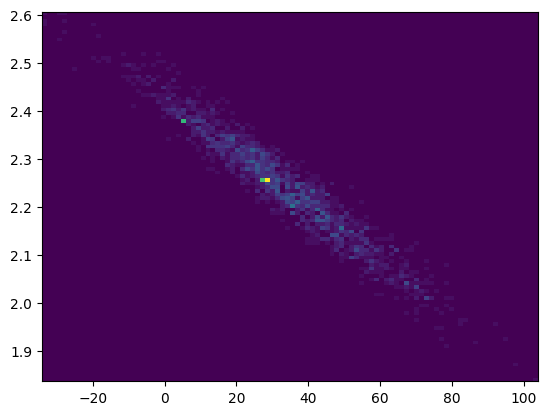

In [349]:
flat_samples_sigma = sampler.get_chain(discard=100, thin=300 , flat=True)
counts_sigma, xbins, ybins, image = plt.hist2d(flat_samples_sigma[:,0],
                                         flat_samples_sigma[:,1],
                                         bins = 100)

In [353]:
nwalkers = 10
ndim = 5

x0_mean = np.array([34., 2.2, 0.0, 0.0, 0.0])
# Add small random noise to initialize each walker near x0_mean
x0 = x0_mean + 1e-4 * np.random.randn(nwalkers, ndim)
# x0 = np.tile(x0_mean, (nwalkers, 1))
# x0[:, 0] += 1e-4 * np.random.randn(nwalkers)
# x0[:, 1] += 1e-4 * np.random.randn(nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[X[4:], Y[4:], sigma_Y[4:]/2])

In [354]:
state = sampler.run_mcmc(x0, 100)
sampler.reset()
sampler.run_mcmc(state, 50000)

State([[ 3.62622078e+01  2.22025748e+00  1.94572367e-02 -2.70385137e+02
   3.63162935e-03]
 [ 4.79650682e+01  2.14201150e+00  2.90437814e-01  4.02791599e+02
   5.82948576e+02]
 [ 2.61867414e+01  2.26797837e+00  2.31865035e-01  4.07981085e+02
   9.91367548e-01]
 [ 3.81027946e+01  2.23172713e+00  1.44519201e-01  3.04712257e+02
   1.92888271e-03]
 [ 2.15220731e+01  2.31713664e+00  2.52760407e-01  4.19435713e+02
   1.22667261e-04]
 [ 5.21647141e+01  2.13760035e+00  1.55975075e-01  3.28819338e+02
   1.72803677e-07]
 [ 3.45458071e+01  2.27708948e+00  1.03289341e-01  3.23339711e+02
   2.88076925e-14]
 [ 2.92750469e+01  2.30276281e+00  3.28689085e-01  3.05133144e+02
   4.05081318e+00]
 [ 5.30595199e+01  2.08829753e+00  1.97917771e-01  5.15555712e+02
   1.26033191e-13]
 [ 5.46227051e+01  2.05020455e+00  2.66532732e-01  4.80935153e+02
   8.17702403e+02]], log_prob=[-86.07556129 -95.41441771 -88.8646156  -81.65081379 -78.119378
 -72.29401555 -56.65366082 -91.56055389 -61.38270239 -92.47427431], b

In [355]:
sampler.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 5 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1000;
tau: [2543.24337037 2632.52412387 1926.96959646 1954.26234654 3238.24297704]

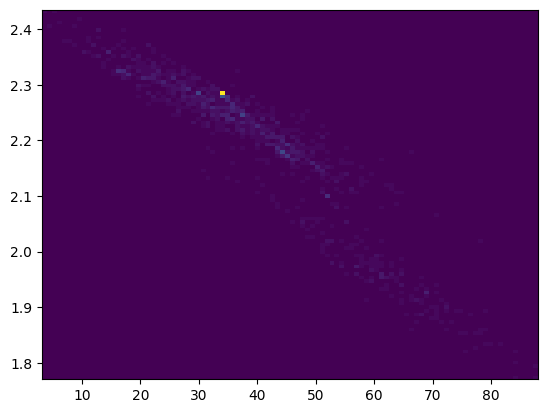

In [356]:
flat_samples_sigmahalf = sampler.get_chain(discard=100, thin=500 , flat=True)
counts_sigmahalf, xbins, ybins, image = plt.hist2d(flat_samples_sigmahalf[:,0],
                                         flat_samples_sigmahalf[:,1],
                                         bins = 100)

b + m x = (32.779812 +/- 19.507917) + (2.244361 +/- 0.112657) x
b + m x = (39.660426 +/- 14.988219) + (2.197928 +/- 0.128482) x


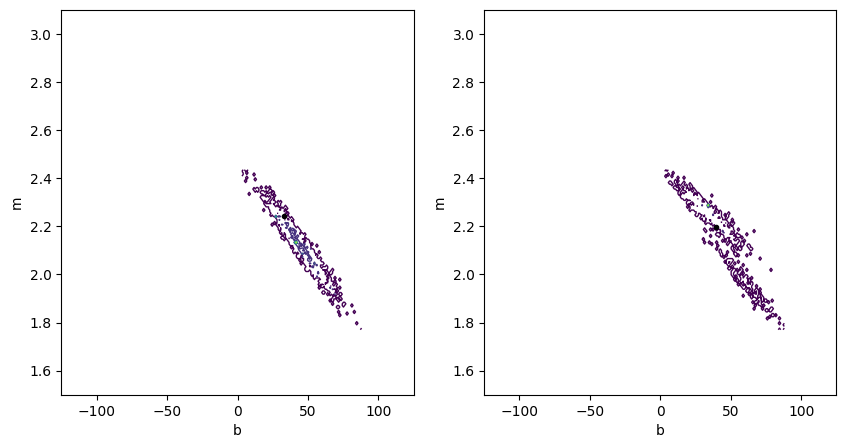

In [357]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
plt.contour(counts_sigma.T, extent = [xbins.min(), xbins.max(), ybins.min(), ybins.max()], linewidths = 1)
plt.xlabel("b"); plt.ylabel("m")
plt.xlim(-125.0, +125.0);
plt.ylim(1.5, 3.1);
plt.plot(np.mean(flat_samples_sigma[:,0]), np.mean(flat_samples_sigma[:,1]), '.k')
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (np.mean(flat_samples_sigma[:,0]), np.std(flat_samples_sigma[:,0]),
                                                 np.mean(flat_samples_sigma[:,1]), np.std(flat_samples_sigma[:,1])))

ax = fig.add_subplot(1,2,2)
plt.contour(counts_sigmahalf.T, extent = [xbins.min(), xbins.max(), ybins.min(), ybins.max()], linewidths = 1)
plt.xlabel("b"); plt.ylabel("m")
plt.xlim(-125.0, +125.0);
plt.ylim(1.5, 3.1);
plt.plot(np.mean(flat_samples_sigmahalf[:,0]), np.mean(flat_samples_sigmahalf[:,1]), '.k')
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (np.mean(flat_samples_sigmahalf[:,0]), np.std(flat_samples_sigmahalf[:,0]),
                                                 np.mean(flat_samples_sigmahalf[:,1]), np.std(flat_samples_sigmahalf[:,1])))